In [1]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [4]:
model_checkpoint = "model-trial-1"
trained_model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint)
tokenizer = AutoTokenizer.from_pretrained("gklmip/bert-tagalog-base-uncased")


In [13]:
LABELS = ["Age", "Gender", "Physical", "Race", "Religion", "Others"]
id2label = {idx:label for idx, label in enumerate(LABELS)}
label2id = {label:idx for idx, label in enumerate(LABELS)}

In [5]:
test_sentence = "ambobo ng mga batang katoliko na bisaya"

In [21]:
def preprocess_text(text):
    encoding = tokenizer(text, padding="max_length", truncation=True, max_length=128, return_tensors='pt')
    return encoding

encoded_test_sentence = preprocess_text(test_sentence)

with torch.no_grad():
    model_outputs = trained_model(**encoded_test_sentence)

predictions = model_outputs.logits.sigmoid().tolist()[0]  # Apply sigmoid to get probabilities

label_probabilities = {label: f"{prob * 100:.2f}%" for label, prob in zip(LABELS, predictions)}
print(label_probabilities)

threshold = 0.5
predicted_labels = [(label, f"{pred*100:.2f}%") for label, pred in zip(LABELS, predictions) if pred >= threshold]

print("Input:", test_sentence)
print("Probabilities: ", label_probabilities)

print("Labels:")
for label, probability in predicted_labels:
    print(f"({label}, {probability})")


{'Age': '50.16%', 'Gender': '6.47%', 'Physical': '5.72%', 'Race': '29.04%', 'Religion': '89.39%', 'Others': '1.56%'}
Input: ambobo ng mga batang katoliko na bisaya
Probabilities:  {'Age': '50.16%', 'Gender': '6.47%', 'Physical': '5.72%', 'Race': '29.04%', 'Religion': '89.39%', 'Others': '1.56%'}
Labels:
(Age, 50.16%)
(Religion, 89.39%)


In [10]:
predictions = model_outputs.logits.sigmoid().tolist()[0]  # Apply sigmoid to get probabilities
 # Get all labels
label_probabilities = [{"name": label, "probability": f"{prob * 100:.2f}%"} for label, prob in zip(LABELS, predictions)]

# Sort the label probabilities by probability values in descending order
label_probabilities = sorted(label_probabilities, key=lambda item: -float(item["probability"][:-1]))
print(label_probabilities)

[{'name': 'Religion', 'probability': '89.39%'}, {'name': 'Age', 'probability': '50.16%'}, {'name': 'Race', 'probability': '29.04%'}, {'name': 'Gender', 'probability': '6.47%'}, {'name': 'Physical', 'probability': '5.72%'}, {'name': 'Others', 'probability': '1.56%'}]


In [7]:
string = "abcdefghijklmnopqrstuvwxyz"

letters = [letter.upper() for letter in string]
letters

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [3]:
import torch
torch.cuda.is_available()

True

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np      

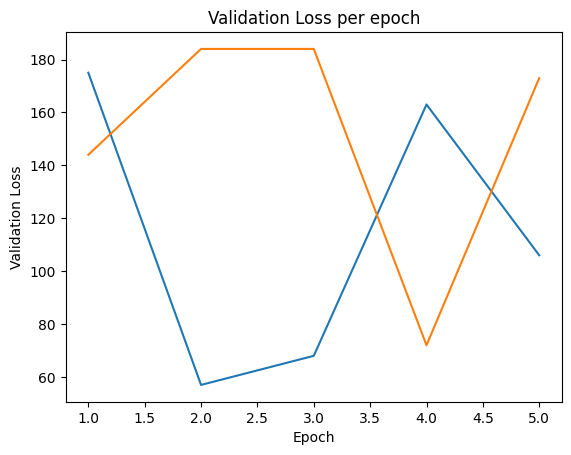

In [64]:
y1 = np.random.randint(0, 250, 5)
x1 = [i for i in range(1, len(y1)+1)]
y2 = np.random.randint(0, 250, 5)
x2 = [i for i in range(1, len(y2)+1)]


plt.title("Validation Loss per epoch")
plt.plot(x1, y1, x2, y2)
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.show()

In [68]:
noun1 = input("Noun 1:")
noun2 = input("Noun 2:")


print(f'The {noun1} came before the {noun2}')

The Chicken came before the Egg


In [1]:
class Player:
    def __init__(self, name) -> None:
        self.name = name
        self.money = 1000

    def get_money(self):
        return self.money
    
    def set_money(self, new_amount):
        self.money = new_amount

    def __repr__(self):
        attributes = ', '.join([f'{attr}={getattr(self, attr)}' for attr in dir(self) if not callable(getattr(self, attr)) and not attr.startswith("__")])
        return f"{self.__class__.__name__}({attributes})"



In [2]:
from IPython.display import clear_output

In [3]:
play = True

def pre_game():
    player_name = input("What is your name? ")
    player1 = Player(player_name)
    print(f"Hello {player1.name}! Let's play a game")
    

def main_menu():
    clear_output()
    print('Main Menu')

    global play  
    menu_input = input("1. Play 0. Quit ")

    match menu_input:
        case '1':
            print("Let's play")
            pre_game()
        case '0':
            print("See you next time")
            play = False


while play:
    main_menu()

Main Menu


In [1]:
import torch
from transformers import BertTokenizer, BertModel
import gradio as gr
import os
import torch.nn as nn

In [2]:
class HateSpeechClassifier(nn.Module):
    def __init__(self, model_name, num_labels):
        super(HateSpeechClassifier, self).__init__()
        self.bert_model = BertModel.from_pretrained(model_name)
        self.dropout = nn.Dropout(0.1)
        self.linear = nn.Linear(self.bert_model.config.hidden_size, num_labels)

        for param in self.bert_model.parameters():
            param.requires_grad = True

    def forward(self, ids, mask):
        bert_outputs = self.bert_model(ids, attention_mask=mask)
        cls_hidden_state = bert_outputs.last_hidden_state[:, 0, :] 
        dropped_out = self.dropout(cls_hidden_state)
        logits = self.linear(dropped_out)
        return logits

In [3]:
tokenizer = BertTokenizer.from_pretrained('gklmip/bert-tagalog-base-uncased')
model_name = "gklmip/bert-tagalog-base-uncased"
LABELS = ['Age', 'Gender', 'Physical', 'Race', 'Religion', 'Others']


In [5]:
model = HateSpeechClassifier(model_name, len(LABELS))
model.load_state_dict(torch.load('..\models\\best_trained_model.pth'))

Some weights of BertModel were not initialized from the model checkpoint at gklmip/bert-tagalog-base-uncased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


<All keys matched successfully>

In [42]:

def preprocess_text(text):
    encoding = tokenizer(text, padding="max_length", truncation=True, max_length=128, return_tensors='pt')
    return encoding

def predict_labels(text):
    encoded_text = preprocess_text(text)

    model.eval()
    with torch.no_grad():
        logits = model(ids=encoded_text['input_ids'], mask=encoded_text['attention_mask'])
        
    predictions = logits.flatten().sigmoid()
    probs = [str(round(pred.item() * 100, 2)) + "%" for pred in predictions]

    threshold = 0.5
    predicted_labels = list(zip(LABELS, probs))

    predicted_labels.sort(key=lambda x: float(x[1][:-1]), reverse=True)

    return predicted_labels


In [43]:

print(predict_labels("Ang mga batang babae sa kanto ay kung anu-ano ginagawa"))


[('Age', '98.79%'), ('Gender', '58.62%'), ('Physical', '4.9%'), ('Race', '0.52%'), ('Religion', '0.23%'), ('Others', '0.21%')]
